In [1]:
#importing necessary libraries
import dpkt
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import *


In [2]:
#Loading images
images_data = np.loadtxt("faces.dat")

# Displaying 200th image

In [3]:
#Reshaping  vector into a 64 × 64 matrix for 200th image
reshape_image_200=np.transpose(images_data[199].reshape([64, 64]))
print(reshape_image_200)

[[162. 164. 163. ...  37.  30.  29.]
 [165. 171. 176. ...  38.  29.  29.]
 [165. 170. 175. ...  39.  29.  27.]
 ...
 [123. 118. 123. ...  53.  54.  54.]
 [130. 126. 127. ...  54.  53.  52.]
 [134. 131. 130. ...  54.  53.  54.]]


Text(0.5, 1.0, '200th Image')

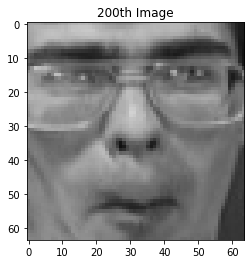

In [4]:
img_200=Image.fromarray(reshape_image_200) # converting numpy array into image.
plt.imshow(img_200)
plt.title("200th Image")

# Removing Mean and Displaying 100th image

Text(0.5, 1.0, '100th Image after removing mean')

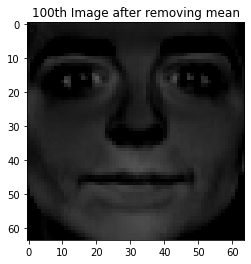

In [5]:
meanValue=np.mean(images_data,axis=0)
centered_value=images_data-meanValue #subtracting mean value from image data
reshape_image_100=np.transpose(centered_value[99].reshape([64, 64])) #reshaping vector into 64*64 matrix
img_100=Image.fromarray(reshape_image_100) #converting to image
plt.imshow(img_100)
plt.title("100th Image after removing mean")

#

Text(0, 0.5, 'y')

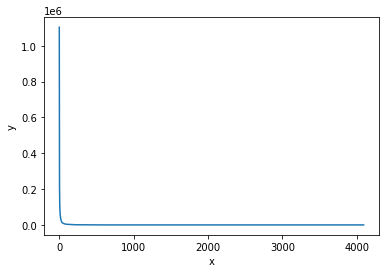

In [6]:
covariance_matrix = np.cov(centered_value , rowvar = False) #finding covariance matrix
eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix) #Getting eigen values and eigen vectors
#sorting eigenvalues in descending order
index_sorted = np.argsort(eigen_values)[::-1]
eigenvalue_sorted = eigen_values[index_sorted]
#sorting eigenvectors in descending order
eigenvectors_sorted = eigen_vectors[:,index_sorted]
plt.plot(eigenvalue_sorted)
plt.xlabel("x")
plt.ylabel("y")


#

In [7]:
eigenvalue_sorted[399] #printing 400th eigen value


1.101239319239041e-10

In [8]:
eigenvalue_sorted[398] #printing 399th eigen value

75.97779586681557

#
Here we are getting 0 for 400th eigenvalue. We know that for a 1-sample t-test, one degree of freedom is spent estimating the mean, and the remaining n - 1 degrees of freedom estimate variability. Here the rank of the covariance matrix is 400 and we centered the images. For this reason, we lost 1 degree of freedom. So, only first 399 eigenvalues are non zero and 400th image is 0.

#

The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.Here we are getting 0 for 400th eigenvalue. So, let's take 400 principal components and check cumulative variance

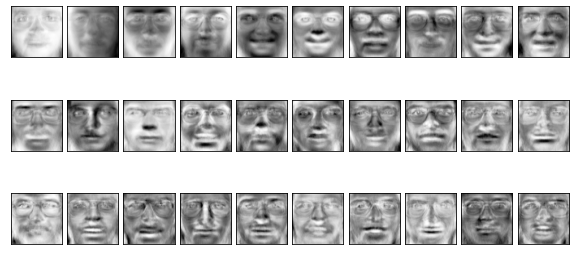

In [9]:
from sklearn.decomposition import PCA
pca = PCA(400) 
pca.fit(images_data)
fig, axes = plt.subplots(3, 10, figsize=(10, 5),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.transpose(pca.components_[i].reshape(64, 64)), cmap='Greys')

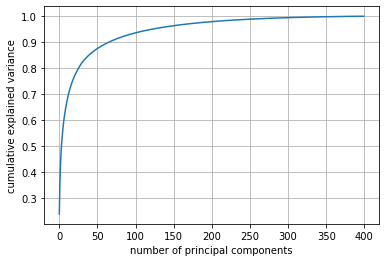

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('cumulative explained variance');
plt.grid()

#
From above graph, we can see that cumulative explained variance is changing till 300 principal components and after that it almost gets constant. Hence, we can say that 300 principal components accounts for most of the variance. So, I want to keep 300 principlal components.

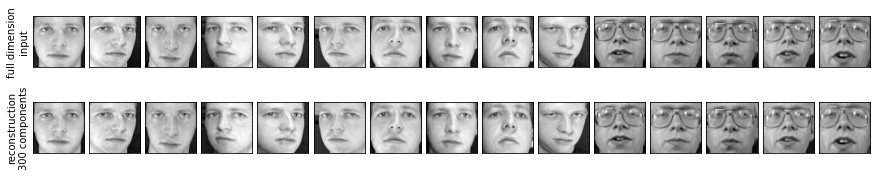

In [11]:
pca = PCA(300).fit(images_data) 
components = pca.transform(images_data) # Computing the components 
projected = pca.inverse_transform(components) # Computing the projected faces
#Displaying 15 pictures
fig, ax = plt.subplots(2, 15, figsize=(15, 3),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(15):
    ax[0, i].imshow(np.transpose(images_data[i].reshape(64, 64)), cmap='binary_r')
    ax[1, i].imshow(np.transpose(projected[i].reshape(64, 64)), cmap='binary_r')   
ax[0, 0].set_ylabel('full dimension\ninput')
ax[1, 0].set_ylabel('reconstruction\n300 components');

#

We will take top 5 leading eigenvector values from our eigen vector and display the image

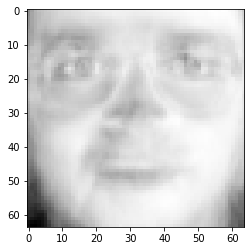

In [12]:
plt.imshow(np.transpose(eigenvectors_sorted[:,0].reshape(64, 64)), cmap='Greys')

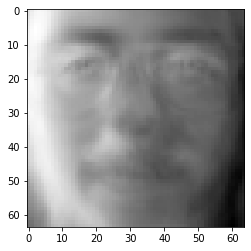

In [13]:
plt.imshow(np.transpose(eigenvectors_sorted[:,1].reshape(64, 64)), cmap='Greys')

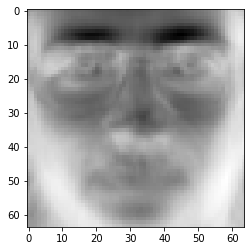

In [14]:
plt.imshow(np.transpose(eigenvectors_sorted[:,2].reshape(64, 64)), cmap='Greys')

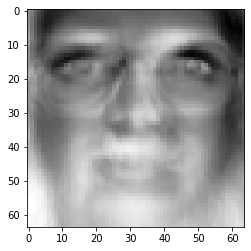

In [15]:
plt.imshow(np.transpose(eigenvectors_sorted[:,3].reshape(64, 64)), cmap='Greys')

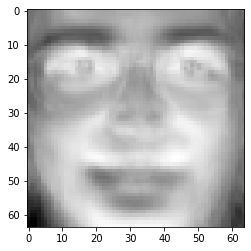

In [16]:
plt.imshow(np.transpose(eigenvectors_sorted[:,4].reshape(64, 64)), cmap='Greys')

#

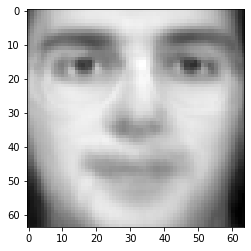

In [17]:
#reconstructed 100th images using 10 principal components
pca1 = PCA(10).fit(images_data)
components_pca1 = pca1.transform(images_data)
projected1 = pca1.inverse_transform(components_pca1)
plt.imshow(np.transpose(projected1[99].reshape(64, 64)), cmap='binary_r')
    

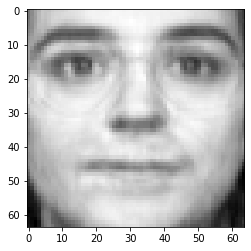

In [18]:
#reconstructed 100th images using 100 principal components
pca2 = PCA(100).fit(images_data)
components_pca2 = pca2.transform(images_data)
projected2 = pca2.inverse_transform(components_pca2)
plt.imshow(np.transpose(projected2[99].reshape(64, 64)), cmap='binary_r')

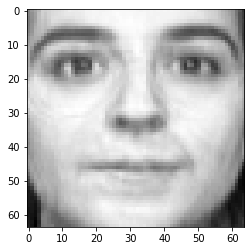

In [19]:
#reconstructed 200th images using 200 principal components
pca3 = PCA(200).fit(images_data)
components_pca3 = pca3.transform(images_data)
projected3 = pca3.inverse_transform(components_pca3)
plt.imshow(np.transpose(projected3[99].reshape(64, 64)), cmap='binary_r')

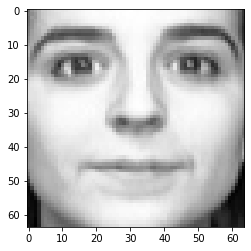

In [20]:
#reconstructed 200th images using 399 principal components
pca4 = PCA(399).fit(images_data)
components_pca4 = pca4.transform(images_data)
projected4 = pca4.inverse_transform(components_pca4)
plt.imshow(np.transpose(projected4[99].reshape(64, 64)), cmap='binary_r')